This image is: <class 'numpy.ndarray'> with dimensions: (224, 224, 3)


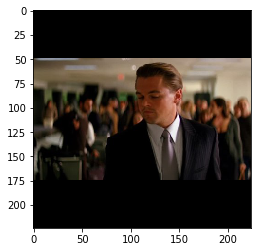

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

#reading in an image
image = mpimg.imread('test.jpg')

padding_size = int((image.shape[1]-image.shape[0])/2)
image = np.pad(image, ((padding_size, padding_size),(0,0),(0,0)), 'constant')

image = cv2.resize(image, (224, 224))

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [10]:
print(cv2.__version__)


vc = cv2.VideoCapture('first_scene.m4v')
c=1

if vc.isOpened():
    rval , frame = vc.read()
    print("Extractiong...")
else:
    rval = False
    print("False")

while rval:
    rval, frame = vc.read()
    cv2.imwrite(str(c) + '.jpg',frame)
    c = c + 1
    cv2.waitKey(1)
vc.release()

3.1.0
False
